In [3]:
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/D2Coding-Ver1.3.2-20180524-all.ttc'
font_location = 'C:/Windows/Fonts/D2Coding-Ver1.3.2-20180524-all.ttc' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

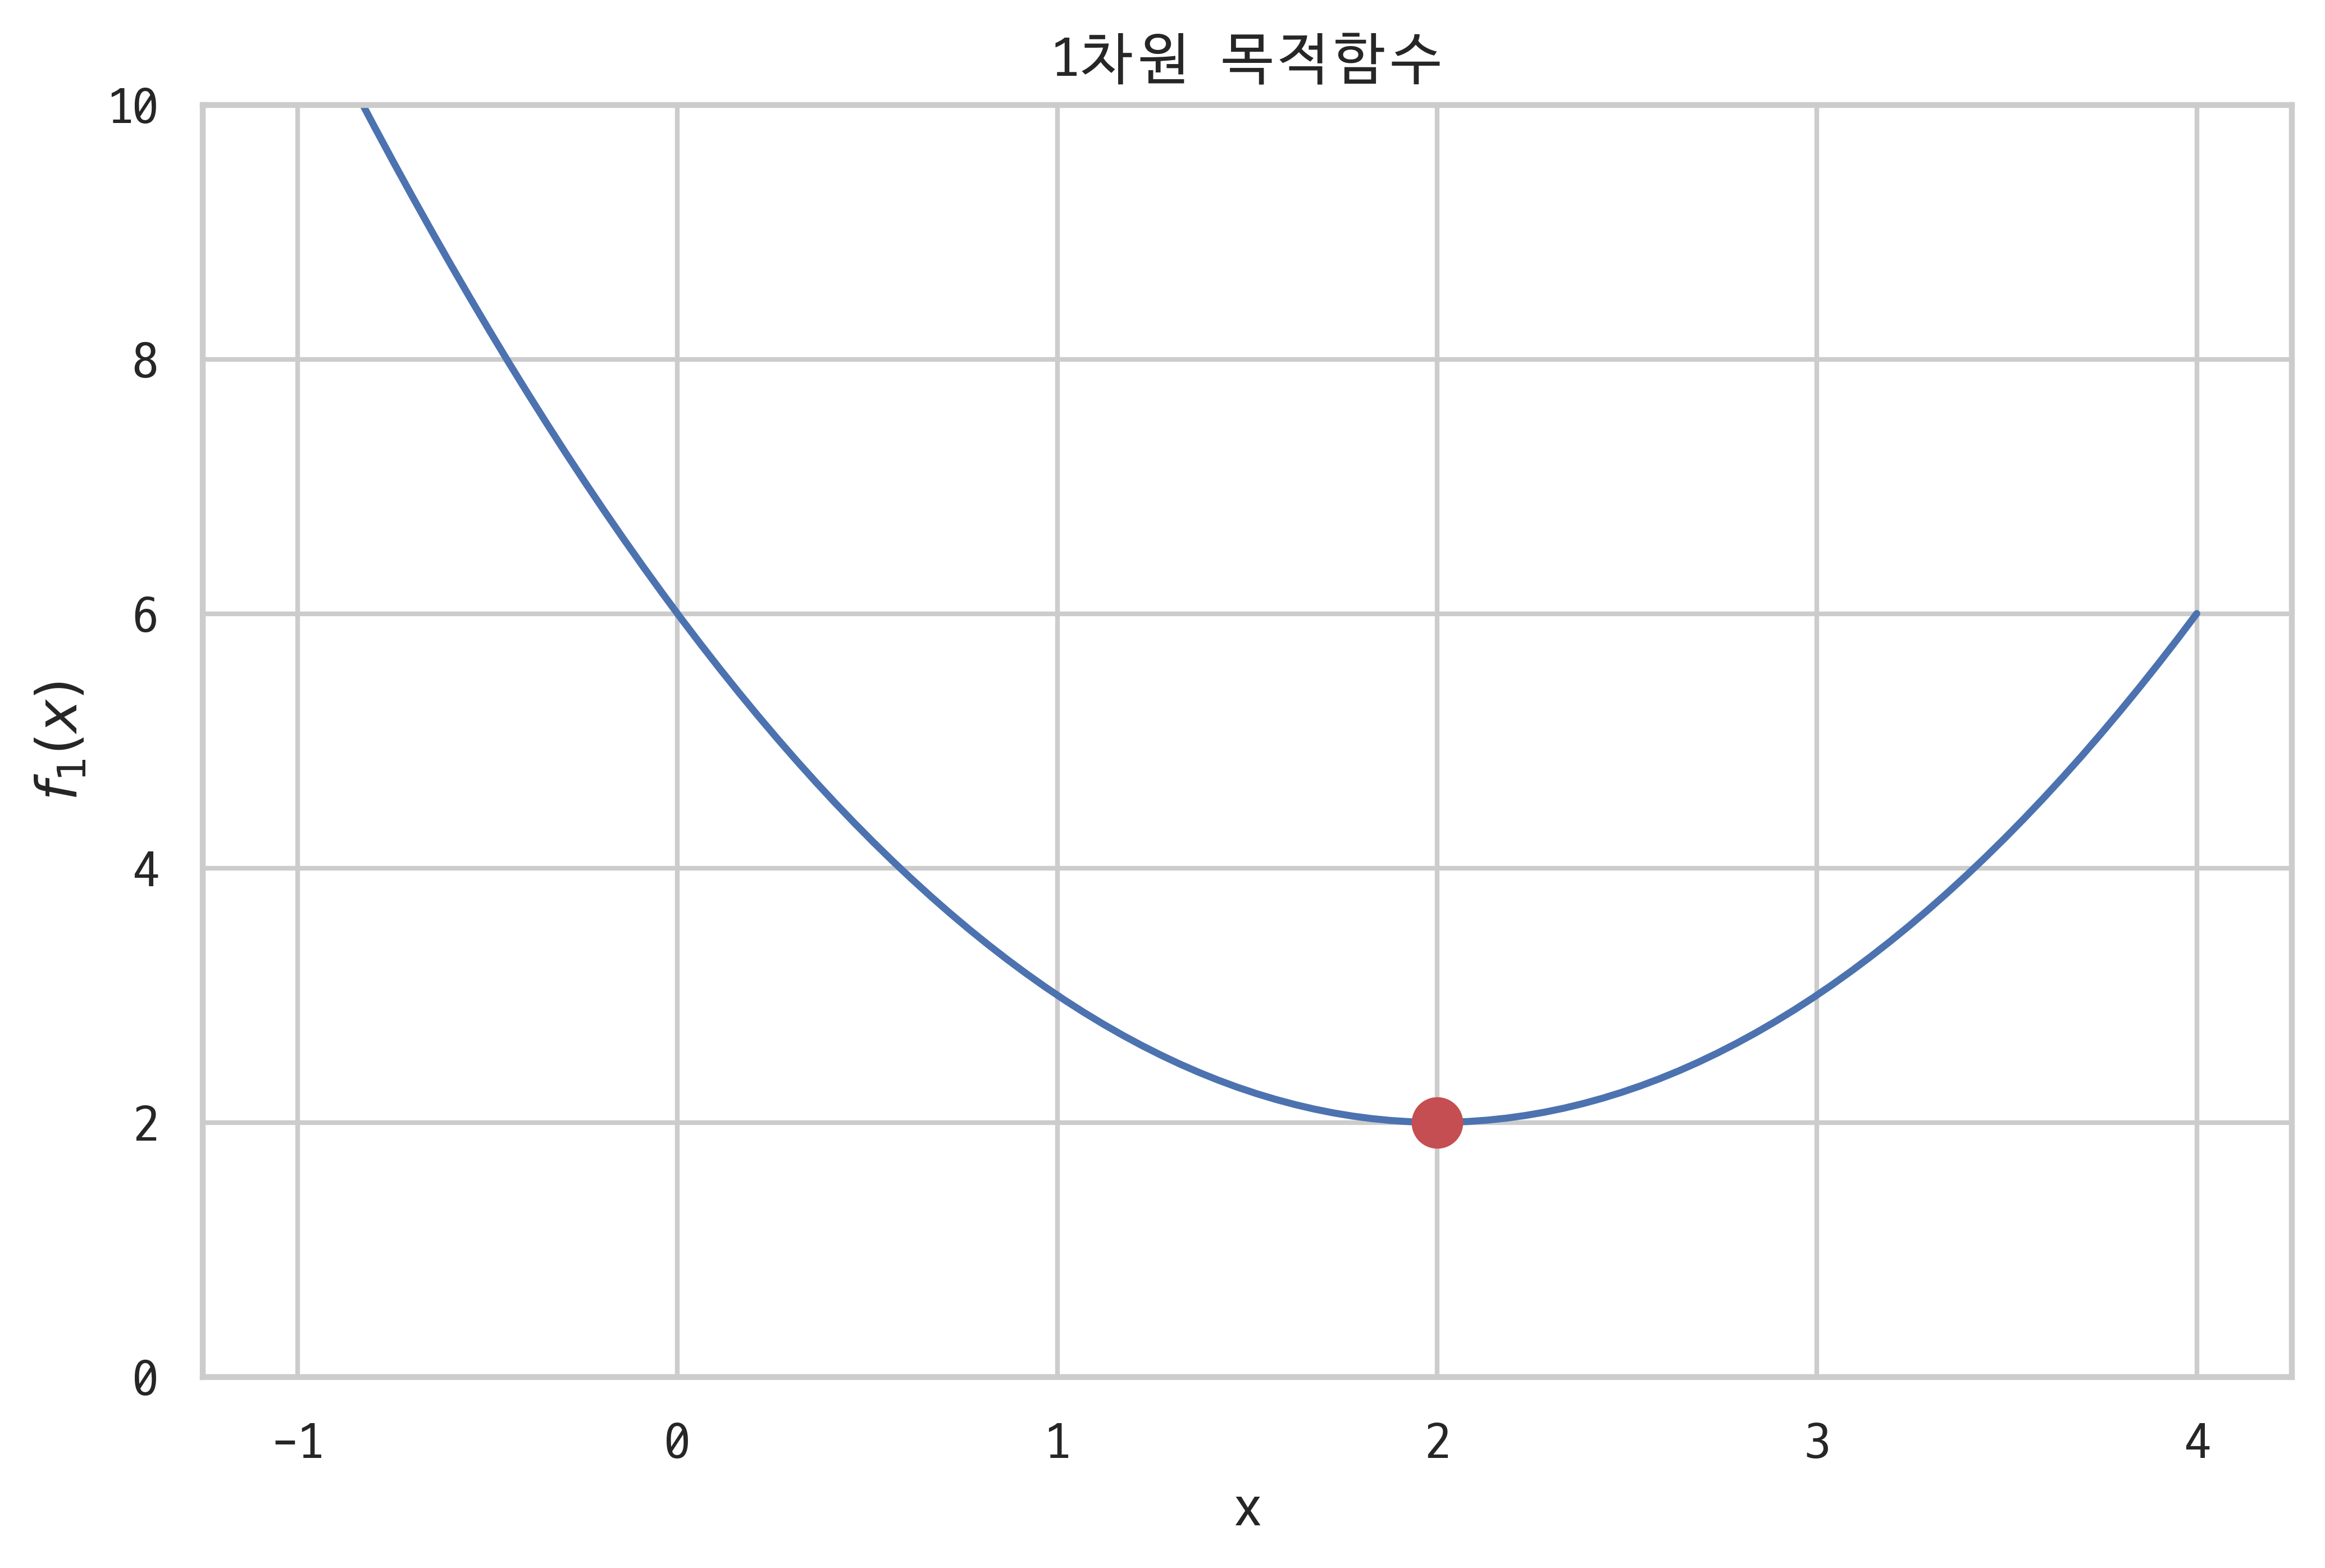

In [21]:
# 1차원 목적함수 예시

def f1(x):
    return (x-2)**2 +2

xx = np.linspace(-1,4,100)
plt.plot(xx, f1(xx))
plt.plot(2,2,'ro',markersize=10)
plt.ylim(0,10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

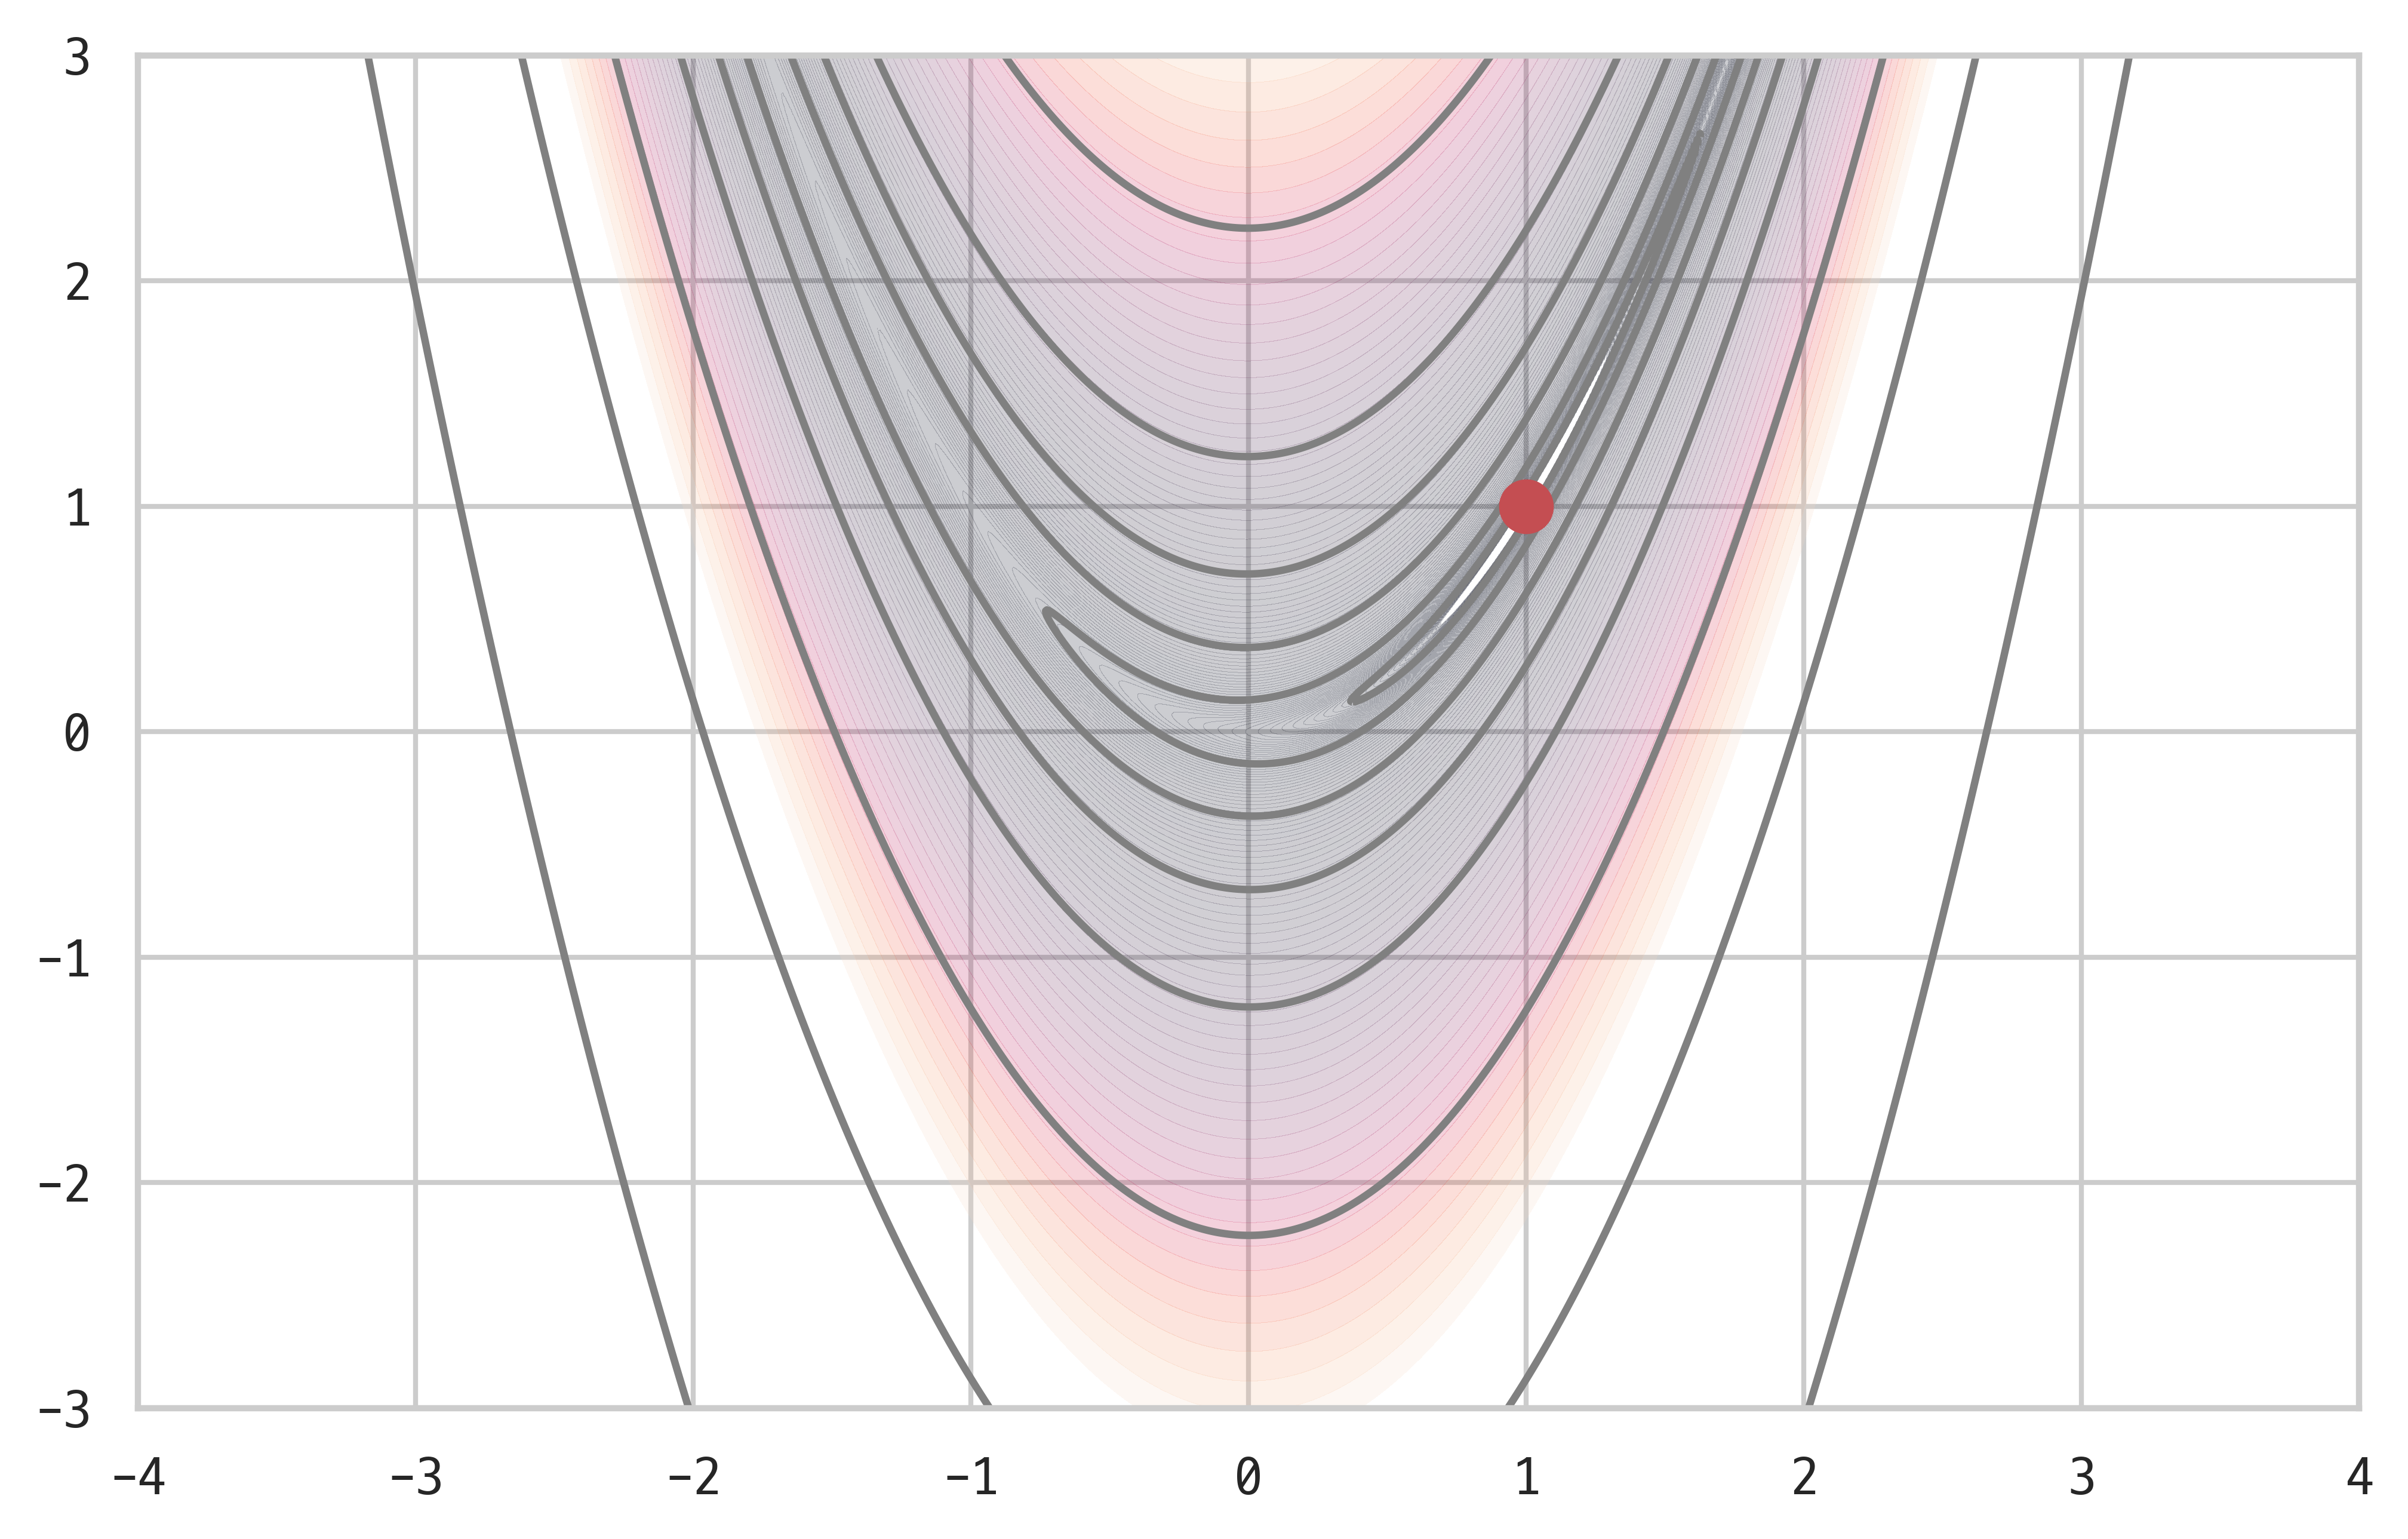

In [33]:
# 2차원 목적함수 예시

def f2(x,y):
    return (1-x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4,4,800)
yy = np.linspace(-3,3,600)

X, Y = np.meshgrid(xx,yy)
Z = f2(X,Y)

levels = np.logspace(-1,3,100)
plt.contourf(X, Y, Z, alpha = 0.2, levels=levels)
plt.contour(X, Y, Z, colors = "gray",
           levels = [0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1,1, 'ro', markersize = 10)


1차 시도 : x_1 = 0.00, g_1 = -4.00
2차 시도 : x_2 = 1.60, g_2 = -0.80
3차 시도 : x_2 = 1.92, g_2 = -0.16
4차 시도 : x_2 = 1.98, g_2 = -0.03


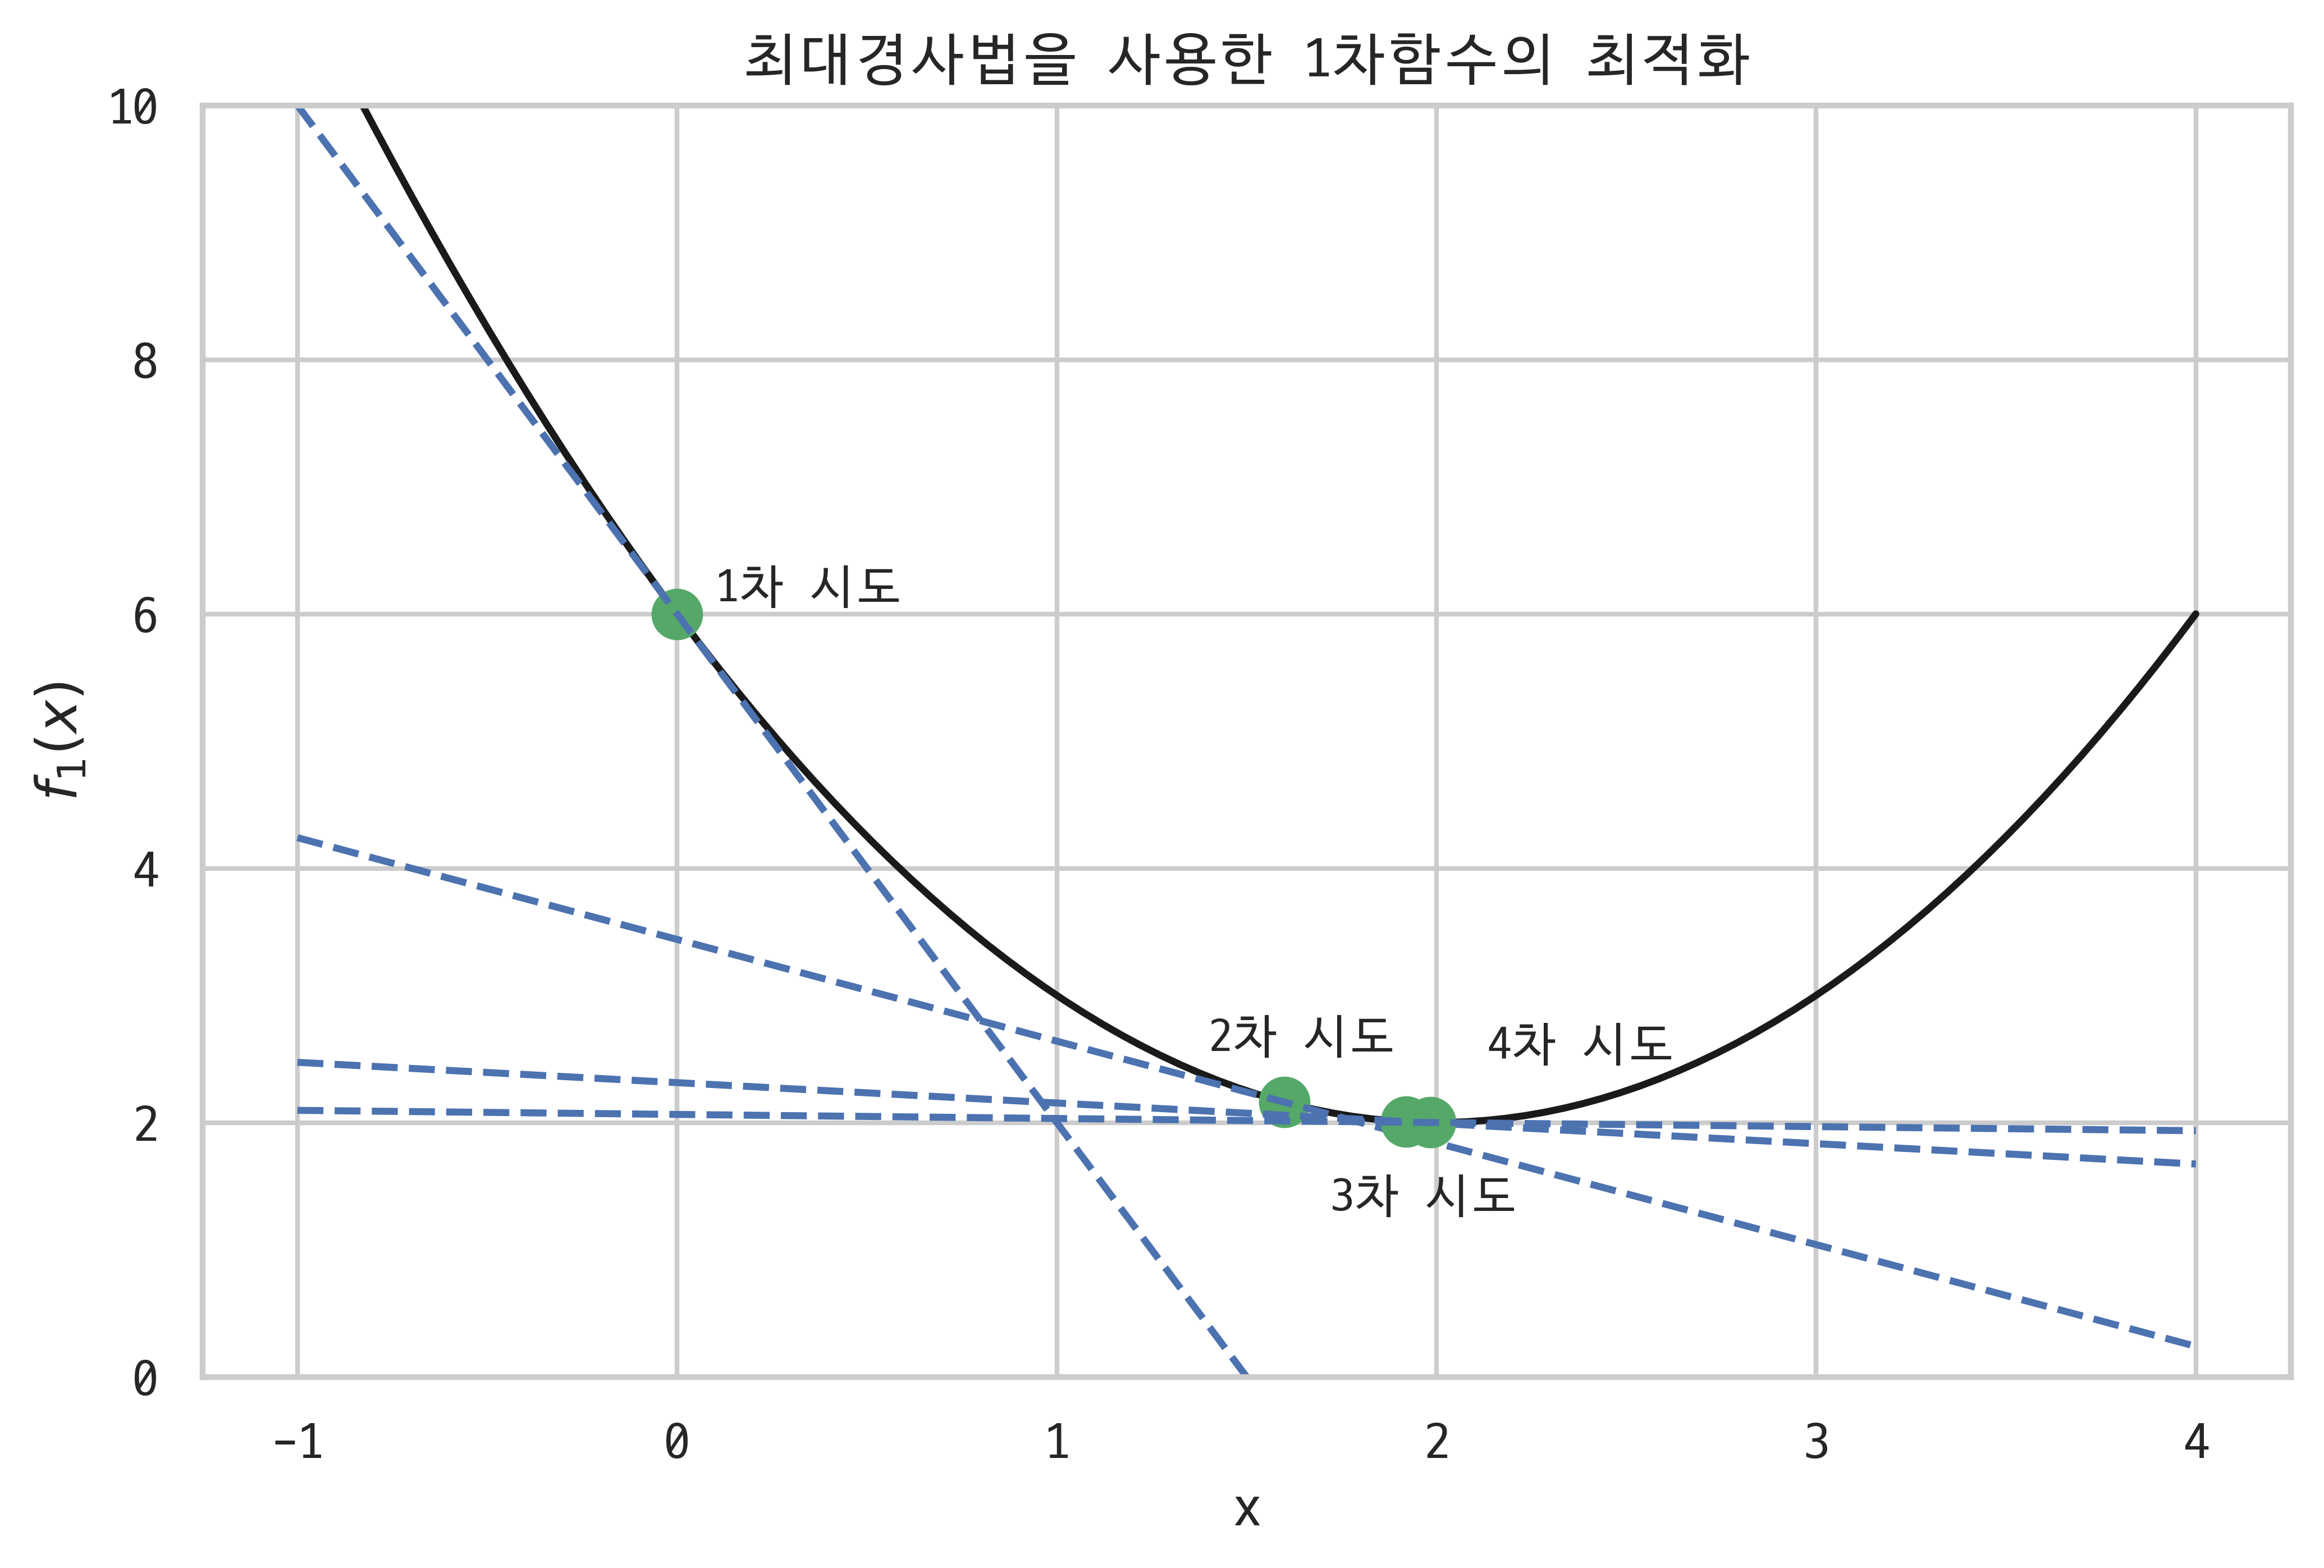

In [56]:
def f1d(x):
    return 2* (x -2.0)

xx = np.linspace(-1,4,100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k=0
x=0
plt.plot(x,f1(x), 'go',markersize=10)
plt.text(x+0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도 : x_1 = {:.2f}, g_1 = {:.2f}".format(x,f1d(x)))

# k=1
x = x -mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx-x)+ f1(x), 'b--')
print("2차 시도 : x_2 = {:.2f}, g_2 = {:.2f}".format(x,f1d(x)))

# k=2
x = x -mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) -0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx-x)+ f1(x), 'b--')
print("3차 시도 : x_2 = {:.2f}, g_2 = {:.2f}".format(x,f1d(x)))

# k=3
x = x -mu * f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.15, f1(x) +0.5, "4차 시도")
plt.plot(xx, f1d(x) * (xx-x)+ f1(x), 'b--')
print("4차 시도 : x_2 = {:.2f}, g_2 = {:.2f}".format(x,f1d(x)))



plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(0,10)
plt.show()

In [59]:
def f2g(x, y):
    """f2(x, y)의 도함수"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

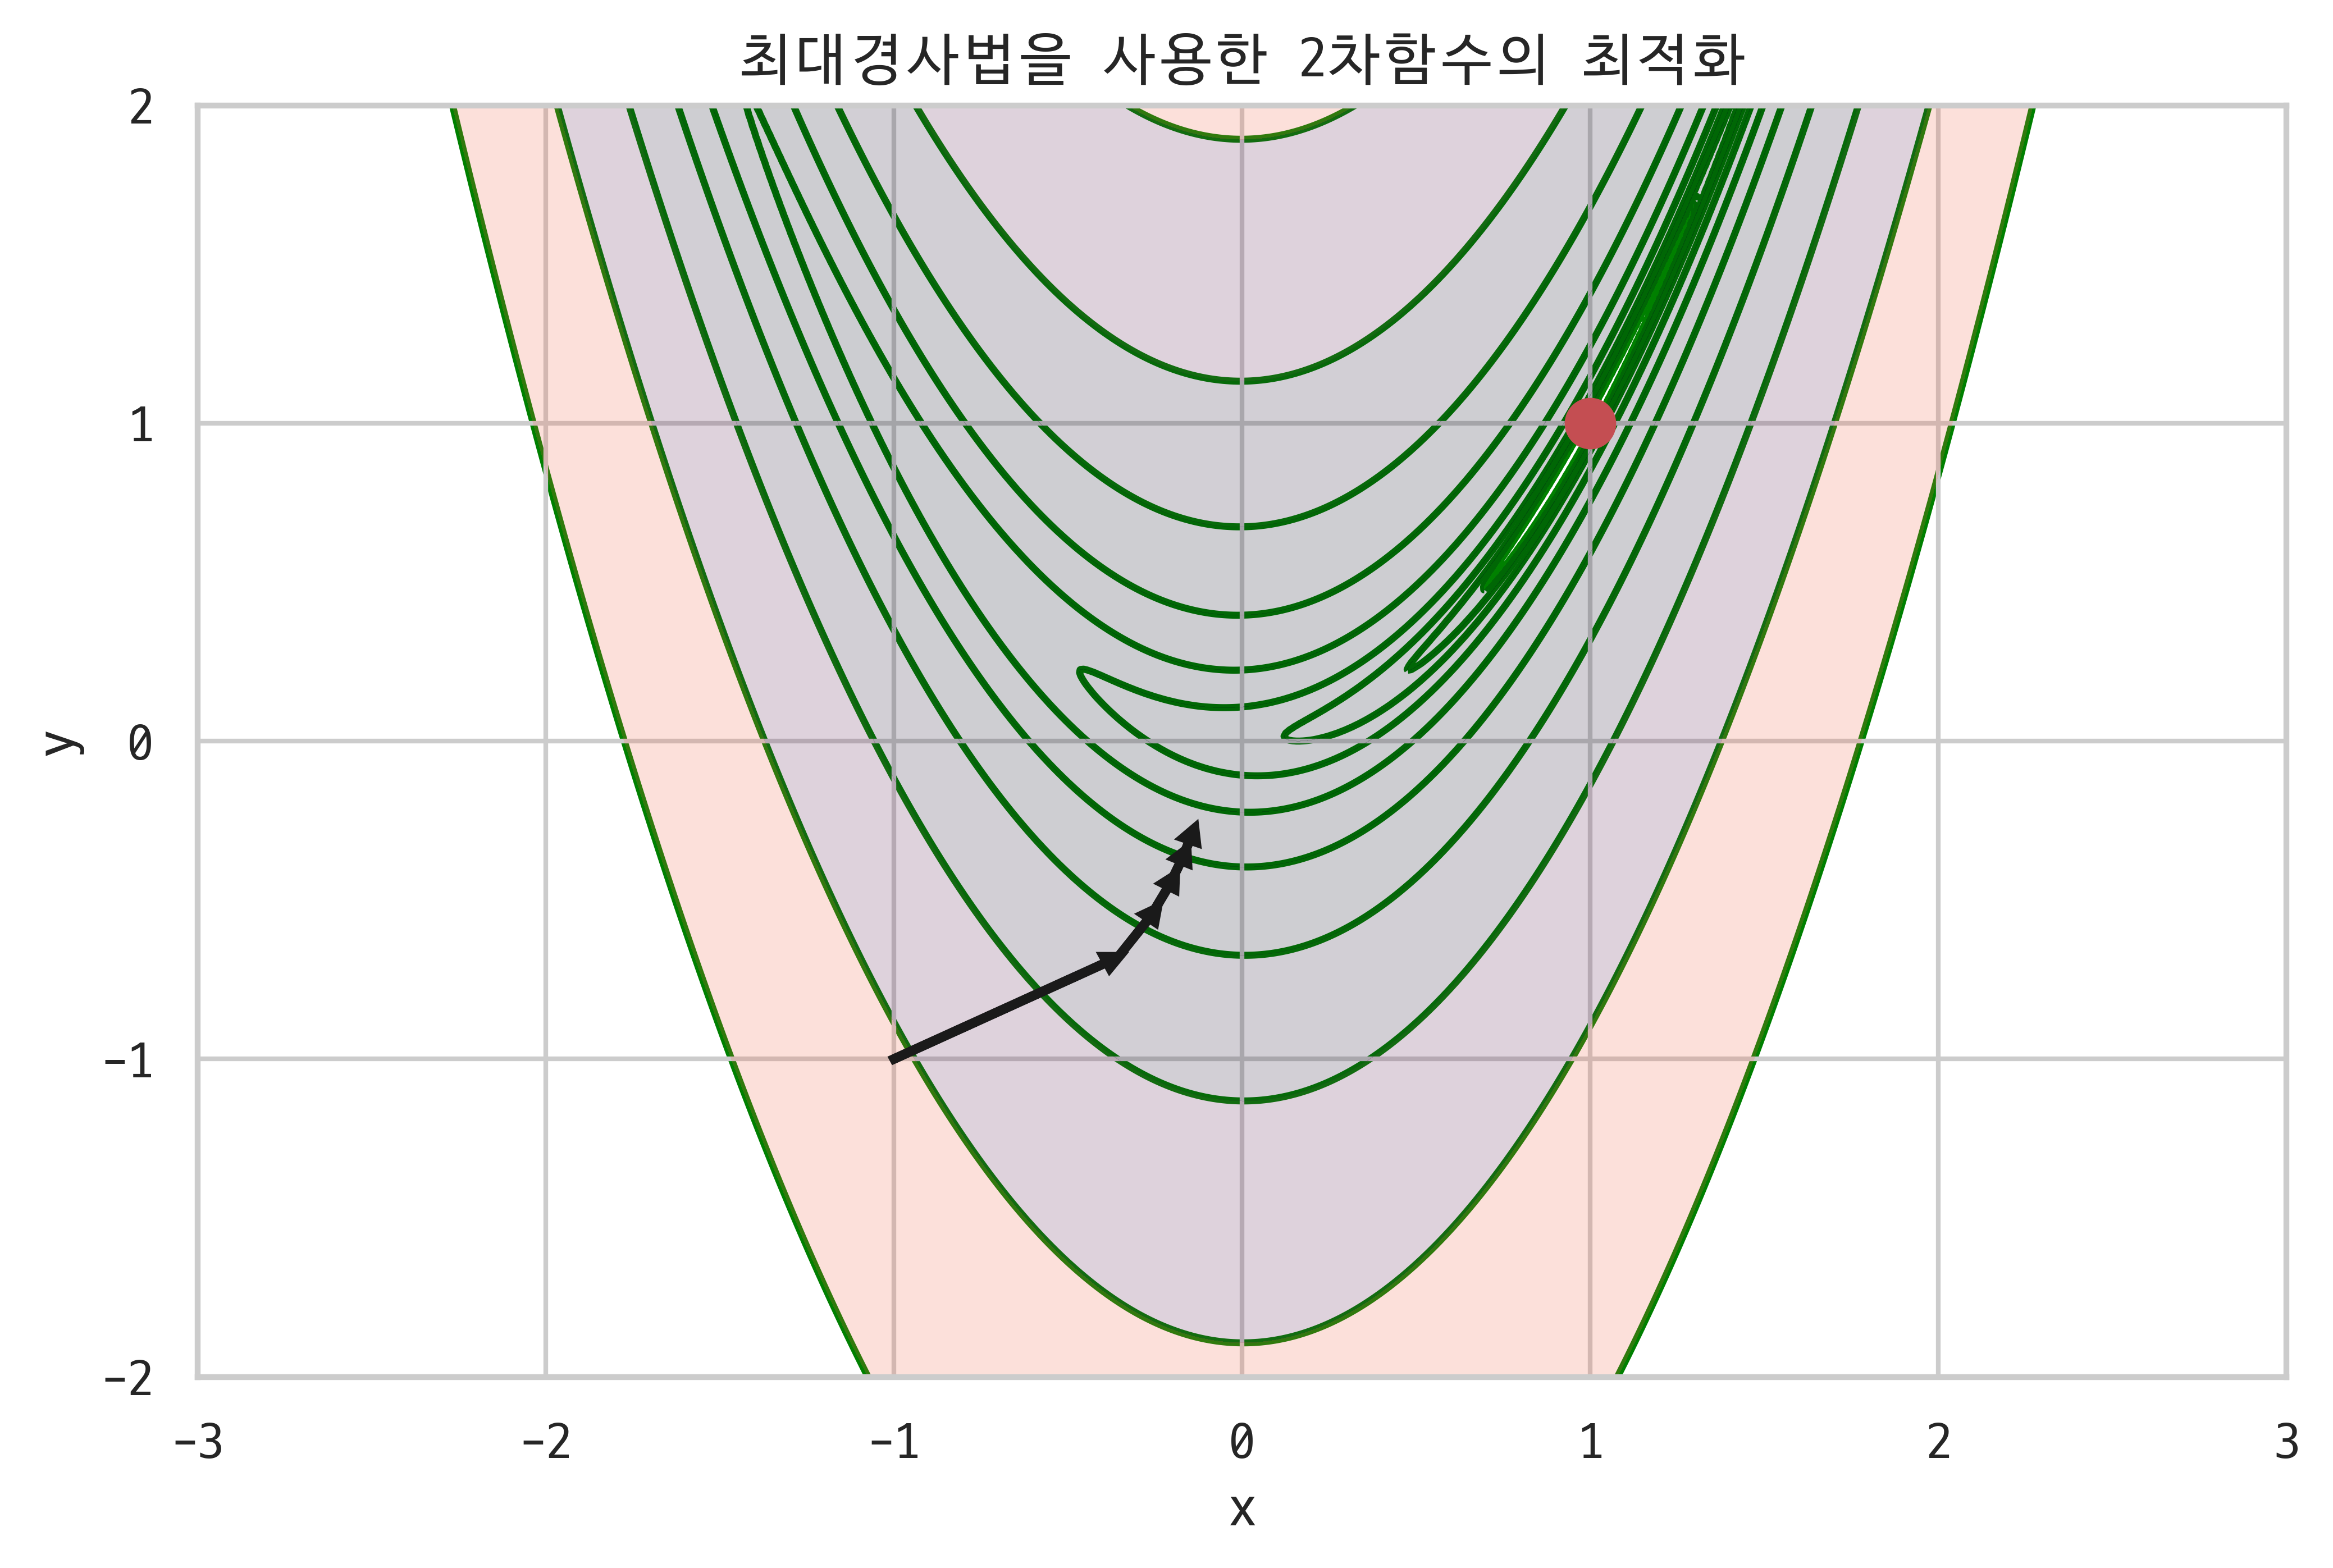

In [60]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

x, y = -1, -1
for i in range(5):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화")
plt.show()

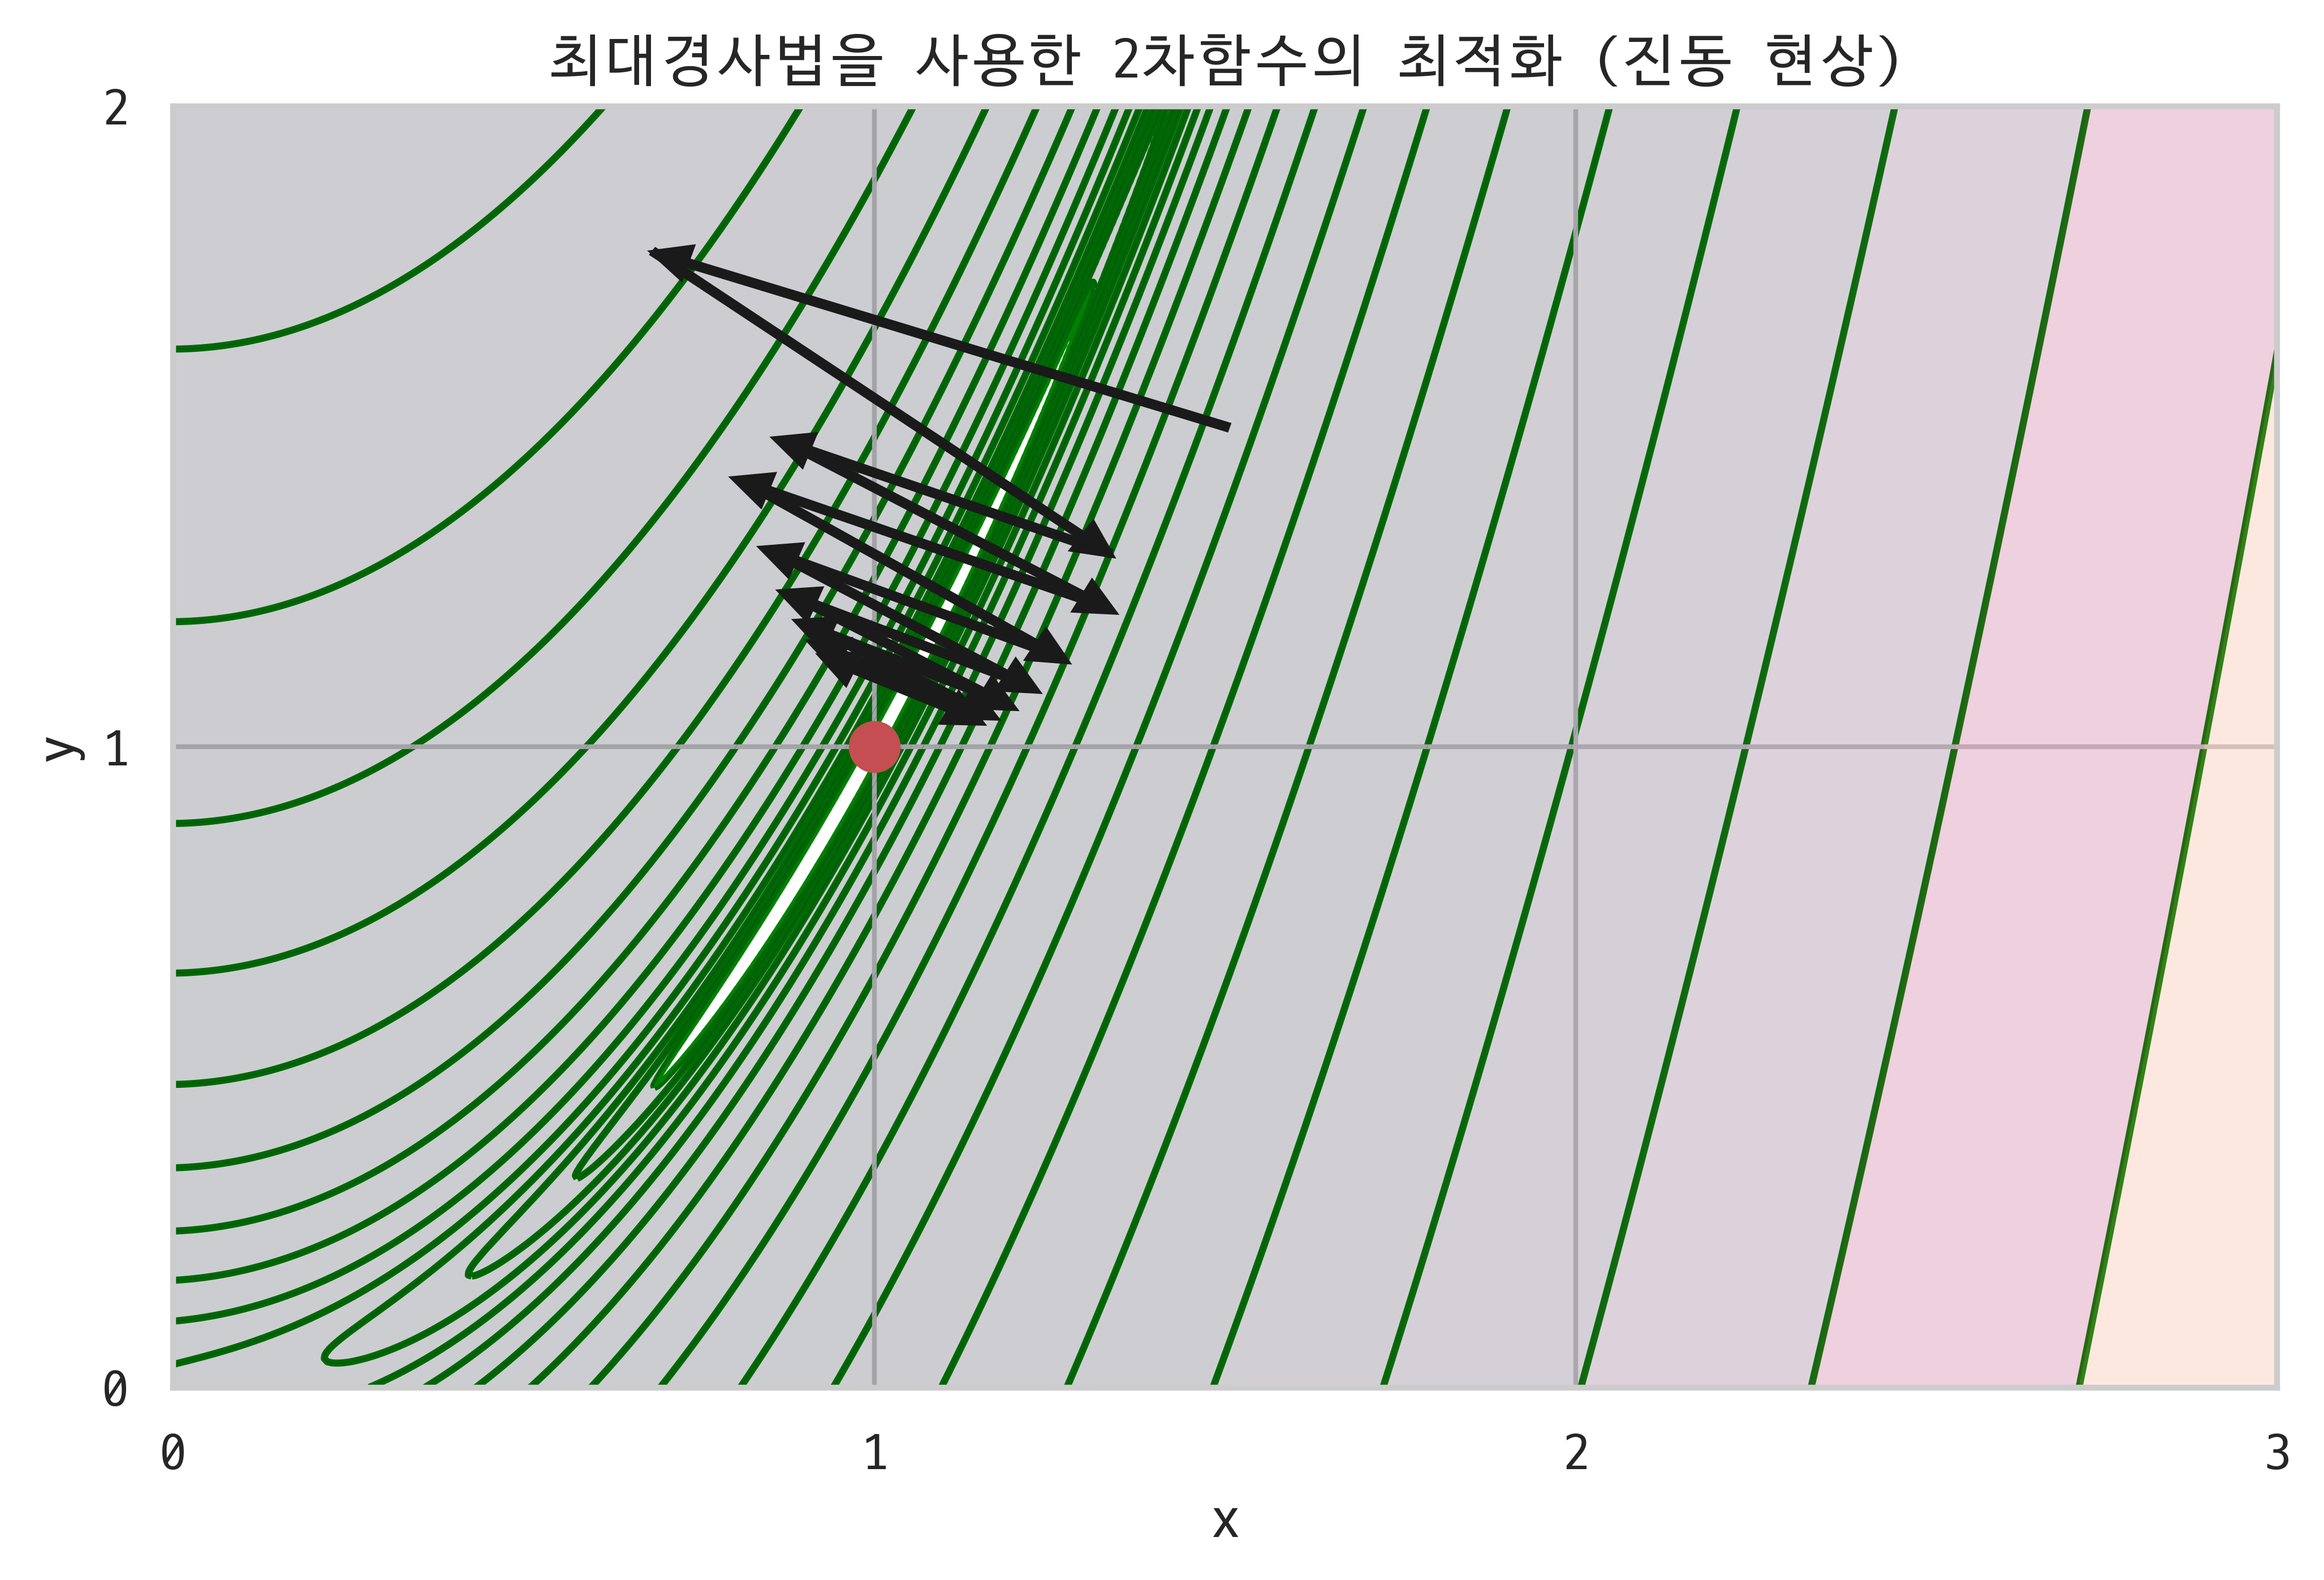

In [61]:
xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)")
plt.show()

In [62]:
# 목적함수의 재정의
def f1(x):
    return (x-2) ** 2+ 2

x0 =0
result = sp.optimize.minimize(f1,x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [63]:
def f1p(x):
    """f1(x)의 도함수"""
    return 2* (x-2)

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


In [65]:
# 2차원 목적함수 재정의 (벡터 입력을 받도록)
def f2(x):
    return (1 -x[0])**2 + 100.0*(x[1] - x[0]**2)**2

x0 = (-2, -2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 5.2112890141803265e-12
 hess_inv: array([[0.49938636, 0.99860874],
       [0.99860874, 2.00187364]])
      jac: array([ 7.32138760e-05, -3.35902622e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 55
     njev: 131
   status: 2
  success: False
        x: array([0.99999854, 0.9999969 ])


In [66]:
# (1)

def f2(x):
    return (1 -x[0])**2 + 100.0*(x[1] - x[0]**2)**2

x0_new = (2, 0.3)

result = sp.optimize.minimize(f2, x0_new, jac =None)
print(result)

      fun: 2.0894330936158977e-11
 hess_inv: array([[0.49022114, 0.98027054],
       [0.98027054, 1.96519142]])
      jac: array([ 1.58932767e-06, -8.86389917e-07])
  message: 'Optimization terminated successfully.'
     nfev: 100
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999543, 0.99999085])


In [68]:
# (2)

def f2g(x):
    return np.array((2.0 * (x[0] - 1) - 400.0 * x[0] * (x[1] - x[0]**2), 200.0 * (x[1] - x[0]**2)))

result = sp.optimize.minimize(f2, x0_new, jac=f2g)
print(result)

      fun: 1.0392866876869952e-14
 hess_inv: array([[0.49022342, 0.98027934],
       [0.98027934, 1.96521752]])
      jac: array([ 1.58870156e-06, -8.86163987e-07])
  message: 'Optimization terminated successfully.'
     nfev: 25
      nit: 18
     njev: 25
   status: 0
  success: True
        x: array([0.99999991, 0.99999981])
